<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP3611 A Naive Bayes Classifier for the Iris Dataset</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps and University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>. Most of the code was generated using ChatGPT.

## The Iris Data set.

The iris data set is a publicly available dataset. Four numbers charaterising an individual fower have been measured: sepal length, sepal width, petal length, petal width. Irises come in three varieties: setosa, versiocolor and virginica. A publicly available dataset of 150 flowers is available, for each of the flowers the four features (pl, pw, sl, sw) and the variety is available. The following code snippet demonstrates how the dataset can be imported in *scikit-learn* and that plot a scatter plot of the features, using a different marker for each classification.

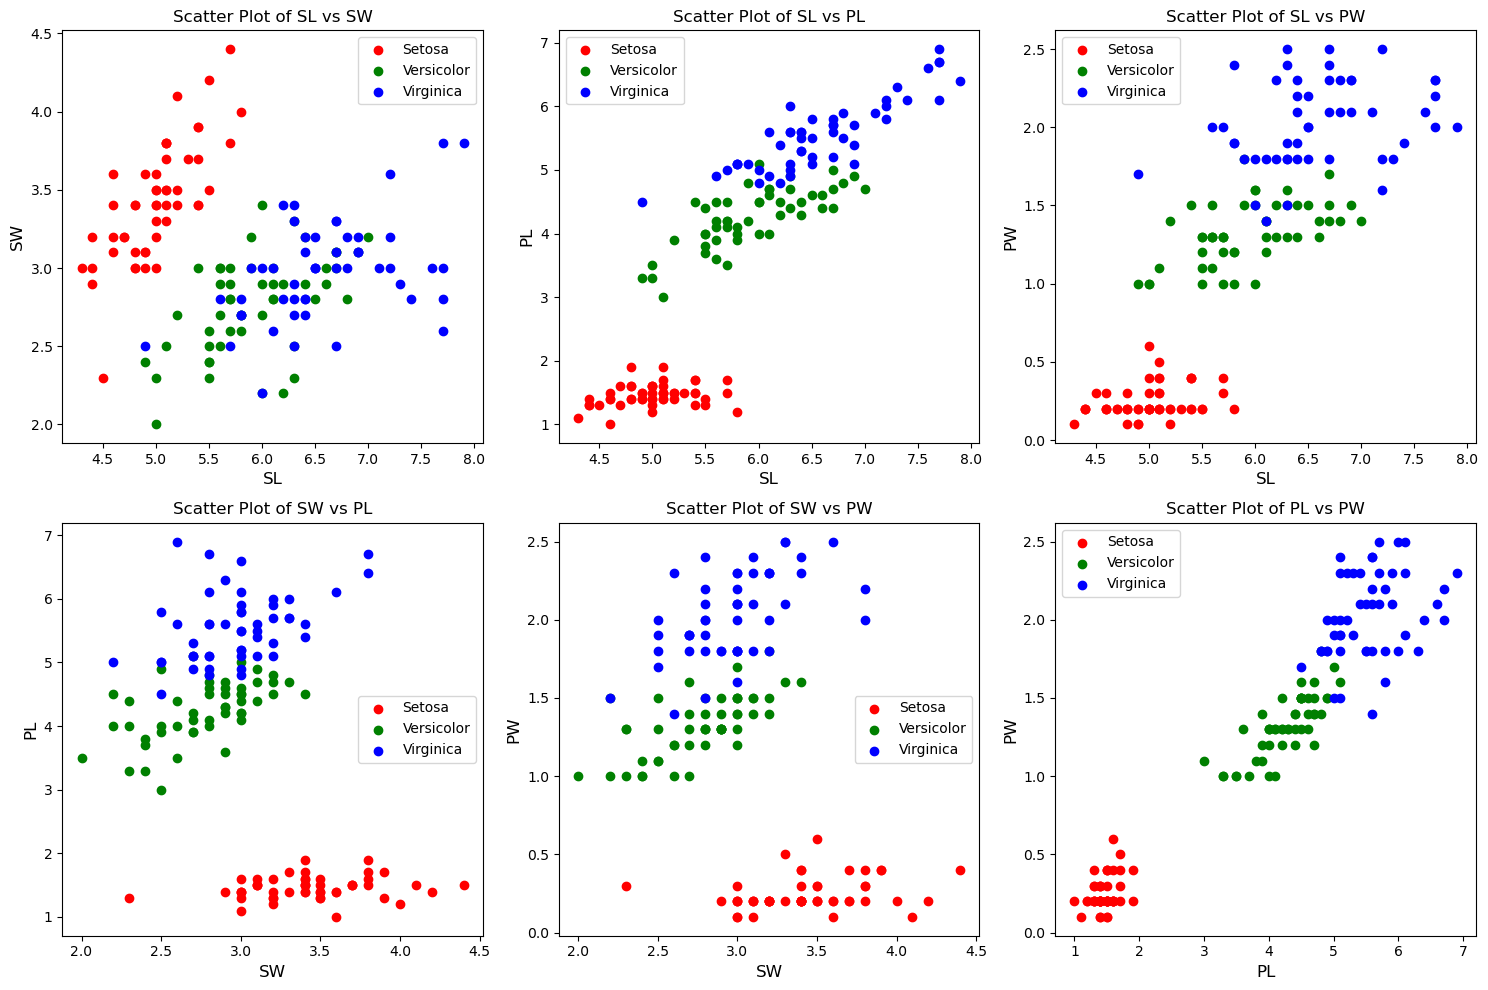

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into arrays for each iris variety
setosa = X[y == 0]
versicolor = X[y == 1]
virginica = X[y == 2]

# Define colors and labels for each variety
colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']
varieties = [setosa, versicolor, virginica]

# Abbreviated feature names
feature_names_abbr = ['SL', 'SW', 'PL', 'PW']

# Define feature pairs for scatter plots
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create scatter plots for each feature pair with increased font size for axis labels
plt.figure(figsize=(15, 10))
for i, (x_index, y_index) in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    for variety, color, label in zip(varieties, colors, labels):
        plt.scatter(variety[:, x_index], variety[:, y_index], color=color, label=label)
    plt.xlabel(feature_names_abbr[x_index], fontsize=12)
    plt.ylabel(feature_names_abbr[y_index], fontsize=12)
    plt.title(f'Scatter Plot of {feature_names_abbr[x_index]} vs {feature_names_abbr[y_index]}')
    plt.legend()
    plt.grid(False)

plt.tight_layout()
plt.show()


## A Naive Bayes Classifier

Although the feature space is four dimensional, the 2D scatter plots show that the features are probably suitable for building a classifier. Just looking at the plots you might get the feeling that the dataset might be modelled by three different Gaussian distributions, with different mean and covariance for each of the three iris varieties.
The idea that each data point is generated from such a distribution and that conditional on class the probabilities for generating data points are independent is the naive Bayes assumption. In the reader it has been explained that this can be used to define a classifier in the following way:

1. The determine the prior probabilties. They are estimated by counting the number of entries for each class and the total number of entries. Dividing gives three fractions, one for each class, which is then taken as the estimate for the prior probability that an event of a particular class will be generated.  **For the iris dataset the prior is equal for each class and in the code below we disregard it**. In general, you need to account for it and in the Reader you can find how to do that.

2. For each class we determine mean and covariance matrix. We use *scikit-learn* functions for this estimation.

3. For a new data point $\vec{x}$, we can calculate $\mathcal{N}(\vec{x} \mid \mu_{setosa}, \Sigma_{setosa})$,
where $\mu_{setosa}, \Sigma_{setosa}$ are the parameters that we have estimated in the previous step.

4. Do this for all classes. Find for which class you get the largest number and decide on that class to classify the points.

The next code snippet shows how the six parameters are estimated.


In [2]:
from sklearn.covariance import EmpiricalCovariance
import numpy as np

# Function to estimate mean and covariance matrix
def estimate_mean_and_covariance(data):
    mean = np.mean(data, axis=0)
    covariance_estimator = EmpiricalCovariance().fit(data)
    covariance_matrix = covariance_estimator.covariance_
    return mean, covariance_matrix

# Estimate for each variety
setosa_mean, setosa_cov = estimate_mean_and_covariance(setosa)
versicolor_mean, versicolor_cov = estimate_mean_and_covariance(versicolor)
virginica_mean, virginica_cov = estimate_mean_and_covariance(virginica)


Once we have estimated these parameters, our classifier is trained. We can now apply it to new datapoints, and we simply do that for each point in the dataset. You should verify that the code below implements step 4.

In [3]:
from enum import Enum
from scipy.stats import multivariate_normal
import numpy as np

# Define an enumeration for the Iris varieties
class IrisVariety(Enum):
    SETOSA = 0
    VERSICOLOR = 1
    VIRGINICA = 2

def classify_iris(datapoint, means, covariances):
    """
    Classifies an Iris flower based on a datapoint in 4D space.

    Parameters:
    - datapoint: A 4D data point (array-like).
    - means: A list of mean vectors for each Iris variety in the order of Setosa, Versicolor, Virginica.
    - covariances: A list of covariance matrices for each Iris variety in the order of Setosa, Versicolor, Virginica.

    Returns:
    - IrisVariety.SETOSA, IrisVariety.VERSICOLOR, or IrisVariety.VIRGINICA.
    """
    # Probabilities for each class
    probabilities = [multivariate_normal.pdf(datapoint, mean=mean, cov=cov) for mean, cov in zip(means, covariances)]
    
    # Return the enumeration value of the class with the highest probability
    return IrisVariety(np.argmax(probabilities))

# The rest of the code remains the same


Now we apply our classifier to each point in the dataset. You really should be separating out test and training set for serious machinelearning, but this gives us a good idea on whether the classifier at least can handle the training set.

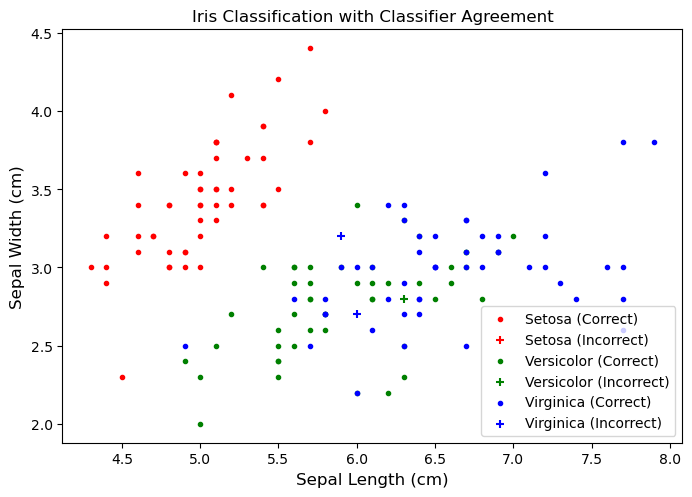

In [4]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt

# Assume the classifier function 'classify_iris' and the data (X, y) are already defined

# Concatenate the means and covariances
means = [setosa_mean, versicolor_mean, virginica_mean]
covariances = [setosa_cov, versicolor_cov, virginica_cov]

# Classification Part - Adapted to use IrisVariety
classified_labels = np.array([classify_iris(point, means, covariances) for point in X])
# Plotting Part - Adapted for IrisVariety
def plot_iris_classification(X, y, classified_labels):
    plt.figure(figsize=(8, 8))  # Increase figure size for better visibility

    for variety, color, label in zip(IrisVariety, ['red', 'green', 'blue'], ['Setosa', 'Versicolor', 'Virginica']):
    
        # Correctly classified points
        correct_classification = (classified_labels == variety) & (y == variety.value)
        plt.scatter(X[correct_classification, 0], X[correct_classification, 1], color=color, marker='.', label=f'{label} (Correct)')
        
        # Incorrectly classified points
        incorrect_classification = (classified_labels == variety) & (y != variety.value)
        plt.scatter(X[incorrect_classification, 0], X[incorrect_classification, 1], color=color, marker='+', label=f'{label} (Incorrect)')
    
    # Set aspect ratio, remove grid, and increase label size
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('Sepal Length (cm)', fontsize=12)
    plt.ylabel('Sepal Width (cm)', fontsize=12)
    plt.title('Iris Classification with Classifier Agreement')
    plt.legend()

    plt.show()

# Call the plotting function with the classified labels
plot_iris_classification(X, y, classified_labels)


The plot above shows that the classifier gets only a few points wrong. We leave it to you to see how the classifier performs when you would actually separate out test and training set.

## A 2D classifier

The previous classifier has been trained of the full 4D feature set. The 2D scatter plots suggests a reasonable separation between the classes, even if only two features have been used. The method remains exactly the same, but in the example below we simply only consider sepal length and sepal width. It performs slightly worse, but we can get an insight in 2D into what the classifier does by simply classifying every point the SL/SW space. We will do that below.

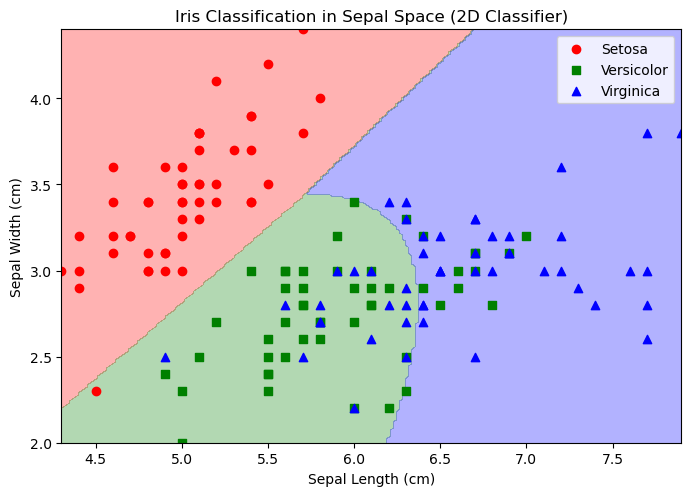

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into arrays for each iris variety
setosa = X[y == 0]
versicolor = X[y == 1]
virginica = X[y == 2]

# Define the means and covariances for sepal dimensions
setosa_mean_sepal = np.mean(setosa[:, :2], axis=0)
setosa_cov_sepal = np.cov(setosa[:, :2], rowvar=False)
versicolor_mean_sepal = np.mean(versicolor[:, :2], axis=0)
versicolor_cov_sepal = np.cov(versicolor[:, :2], rowvar=False)
virginica_mean_sepal = np.mean(virginica[:, :2], axis=0)
virginica_cov_sepal = np.cov(virginica[:, :2], rowvar=False)

sepal_means = [setosa_mean_sepal, versicolor_mean_sepal, virginica_mean_sepal]
sepal_covariances = [setosa_cov_sepal, versicolor_cov_sepal, virginica_cov_sepal]

# Define the 2D classifier function
def classify_iris_sepal(datapoint, means, covariances):
    probabilities = [multivariate_normal.pdf(datapoint, mean=mean, cov=cov) for mean, cov in zip(means, covariances)]
    return np.argmax(probabilities)

# Increase the resolution for smoother boundaries
sepal_length_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
sepal_width_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
sepal_length_grid, sepal_width_grid = np.meshgrid(sepal_length_range, sepal_width_range)

# Classify each point in the grid using the 2D classifier
classified_grid_sepal = np.zeros(sepal_length_grid.shape)
for i in range(sepal_length_grid.shape[0]):
    for j in range(sepal_length_grid.shape[1]):
        datapoint = [sepal_length_grid[i, j], sepal_width_grid[i, j]]
        classification = classify_iris_sepal(datapoint, sepal_means, sepal_covariances)
        classified_grid_sepal[i, j] = classification

# Plotting with modifications
plt.figure(figsize=(8, 8))  # Increase figure size for better visibility and aspect ratio
plt.contourf(sepal_length_grid, sepal_width_grid, classified_grid_sepal, alpha=0.3, levels=[-0.5, 0.5, 1.5, 2.5], colors=['red', 'green', 'blue'])
plt.scatter(setosa[:, 0], setosa[:, 1], color='red', marker='o', label='Setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 1], color='green', marker='s', label='Versicolor')
plt.scatter(virginica[:, 0], virginica[:, 1], color='blue', marker='^', label='Virginica')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Classification in Sepal Space (2D Classifier)')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('irisnaive.pdf')
plt.legend()
plt.show()


Above we have simply classified every point in the plane. The performance is still reasonable! Moreover this visualisation gives a good idea on how it goes wrong and how it will do with generalisation, even without creating a separate training set. It also shows that the decison boundaries are either linear or quadratic. If the covariance matricess are identical, you expect linear decsiion boundaries, if not you expect quadratic ones.